Давыдов ПИм-231 лаба 9_1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [ ]:
df = pd.read_csv("house_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1) Оставьте столбцы с числовыми данными - остальные удалите.

Не забудьте удалить столбец с нумерацией строк.

Сколько столбцов осталось?

In [ ]:
df = df.select_dtypes(include=['number']).drop(columns=['Id'])
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
num_columns = len(df.columns)
print(f"Осталось {num_columns} столбцов.")

Осталось 37 столбцов.


2) Удалите строки с пропущенными данными.

Сколько строк осталось?

In [ ]:
df = df.dropna()
num_rows = len(df)
print(f"Осталось {num_rows} строк.")

Осталось 1121 строк.


3) Постройте тепловую матрицу корреляции без учета целевого столбца (цена продажи).

Используя метод corr Pandas получите числовую матрицу корреляции признаков. Проведите анализ полученных результатов.

Имеет ли смысл какие-то столбцы удалить после проведенного анализа?

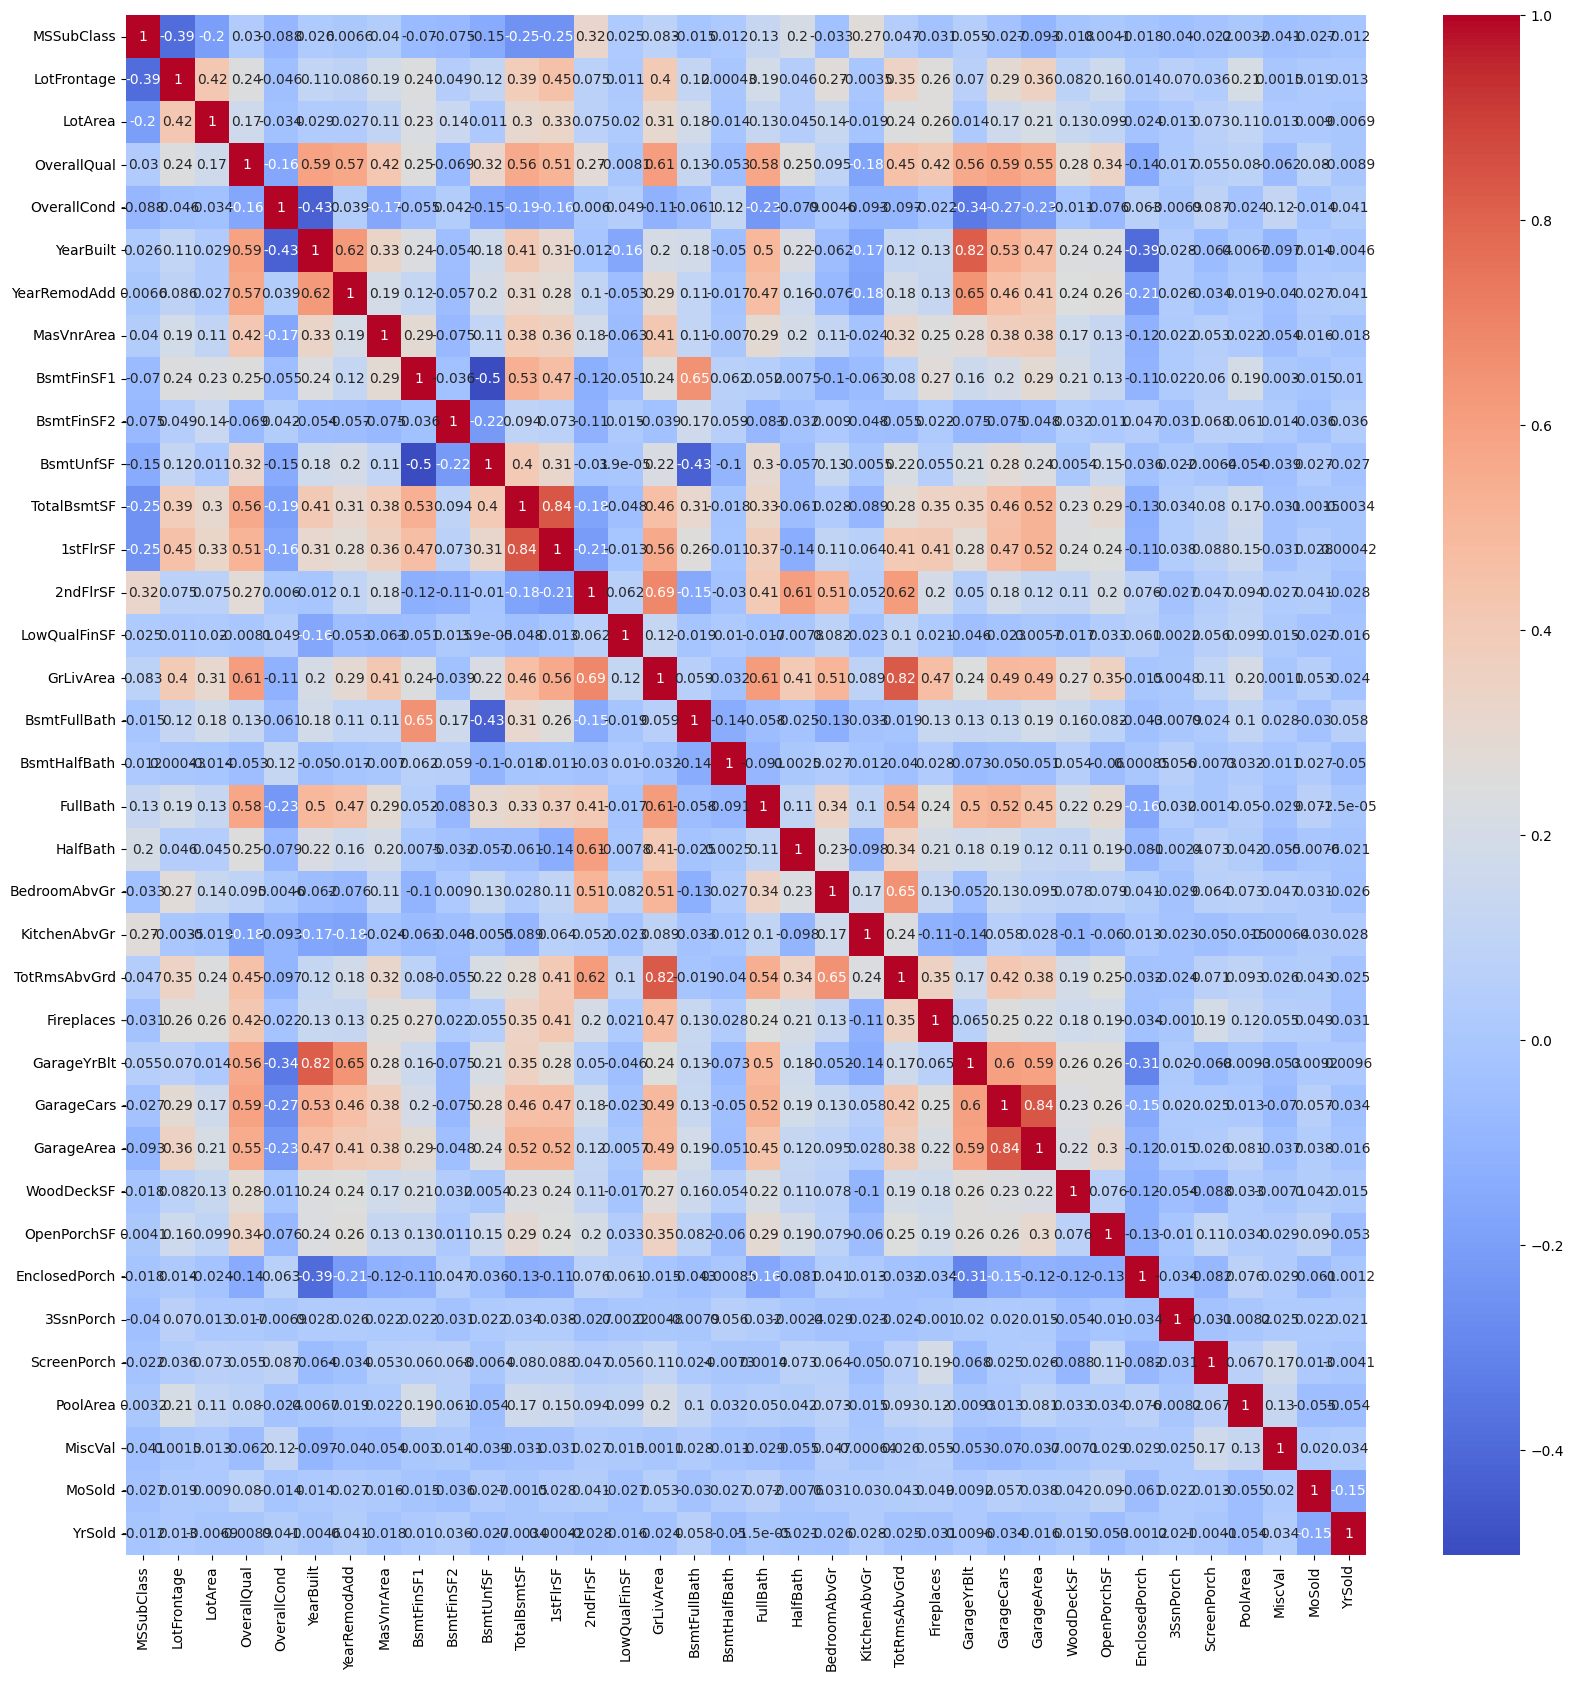

In [ ]:
# Исключение столбца с целевым признаком ('SalePrice')
correlation_matrix = df.drop(columns=['SalePrice']).corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Извините, я забыл, как определять, какой столбец коррелирует с другими, поэтому не буду ничего удалять =(

4) Отделите признаки и целевой столбец.

In [ ]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

5) Разбейте на два множества - для обучения и для тестирования.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6) Обучите модель линейной регрессии и получите оценки качества модели: score, MAE, MSE, RMSE.

Определите наиболее значимые признаки по весовым коэффициентам модели.

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Оценка качества модели
score = model_lr.score(X_test, y_test)
y_pred = model_lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"Коэф. детерминации: {score}, среднее абсолютное отклонение: {mae}, mse: {mse}, rmse: {rmse}.")

Коэф. детерминации: 0.7986350795736619, среднее абсолютное отклонение: 23615.8328784687, mse: 1588229760.7293303, rmse: 39852.60042618713.


7) Изучив приложенный материал, постройте валидационную кривую по различным степеням полиномиальной модели.

Определите оптимальную степень полинома, постройте заново регрессионную модель и сравните полученные качественные оценки модели с п. 6.

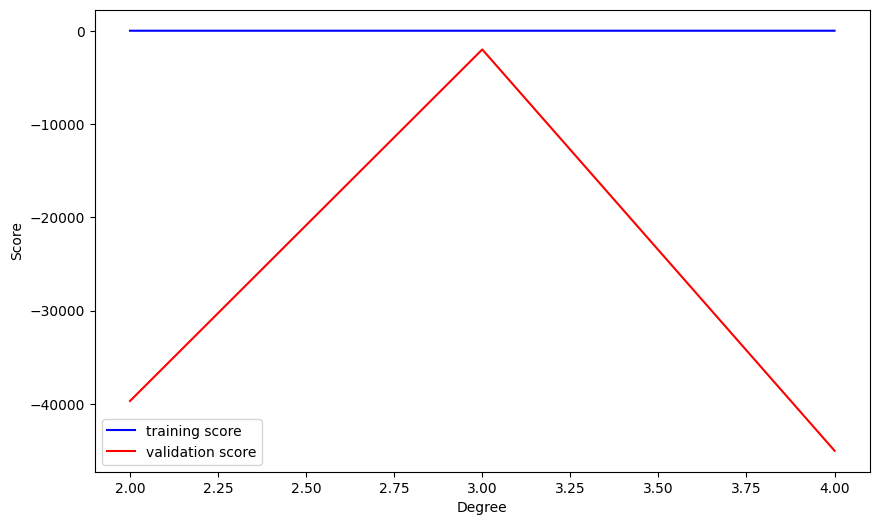

In [ ]:
def PolynomialRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs)) # создал конвеер

degree = np.arange(2, 5) # степени
train_score, val_score = validation_curve( # использую validation_curve, всё как по образцу
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree', param_range=degree, cv=4
)

# Строю график, как по образцу
plt.figure(figsize=(10, 6))
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend()
plt.show()

Я не понимаю, почему Score отрицательный